# Deep Learning Basics

## Multilayer Perceptron/ Feed Forwar Architecture
### Implementing a 3 Layer Neural Network from scratch
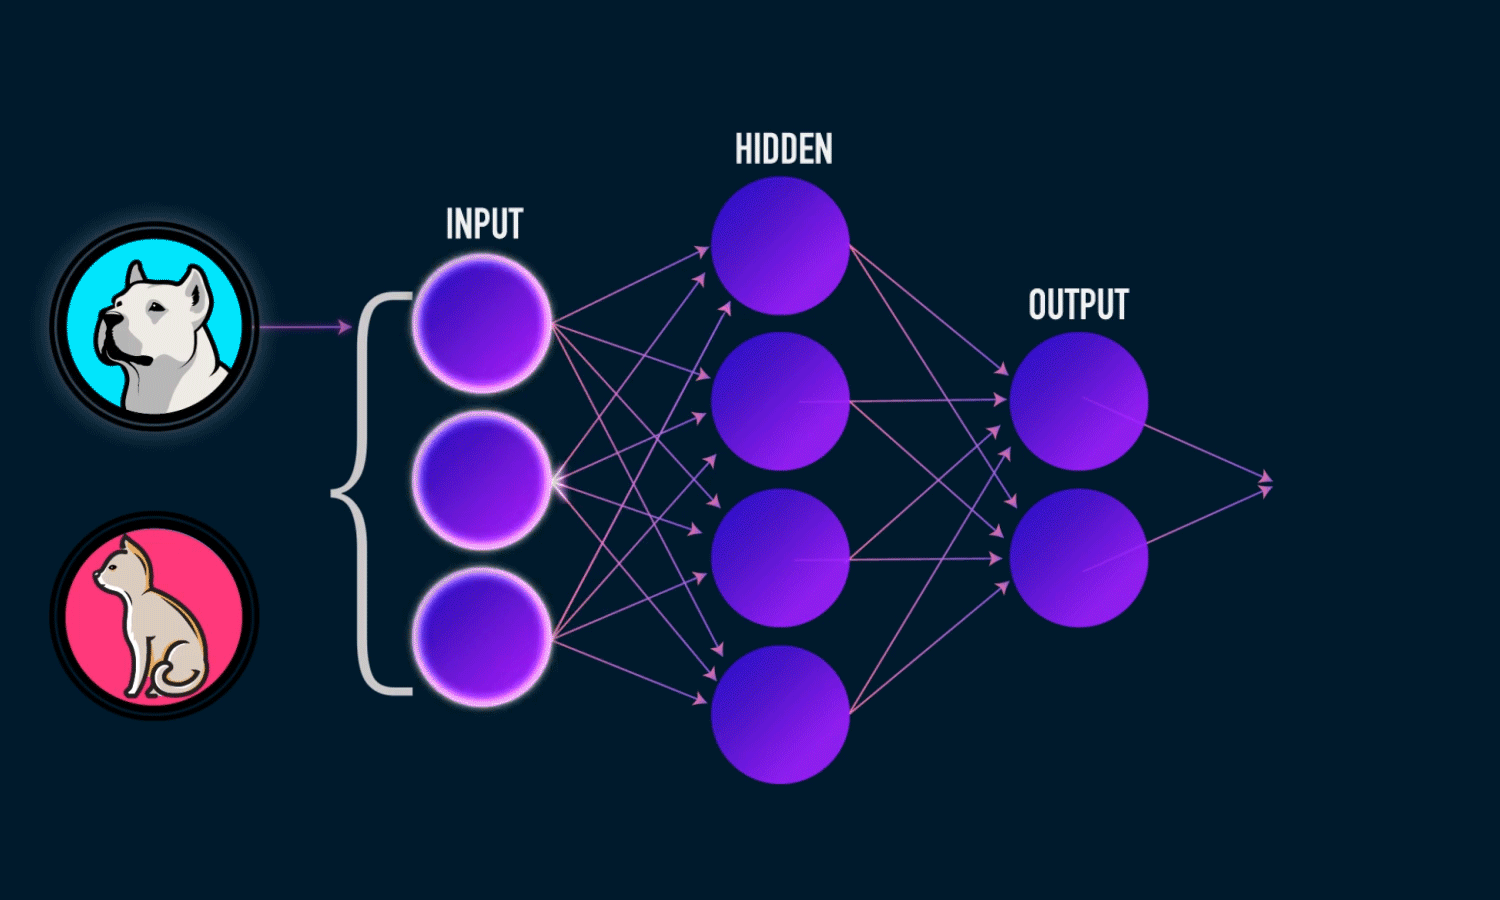

### Learing Goals(Theory + Implementation)
- Understand the Multiplayer Perceptron (MLP)Architecture
- Understanding Forward & Backpropagation, Loss & Activation Fn's
- Making Predictions
- Checking classification performance on different datasets
- Classification Project

# Part - 1 Neural Architecture
### 1 Layer Network
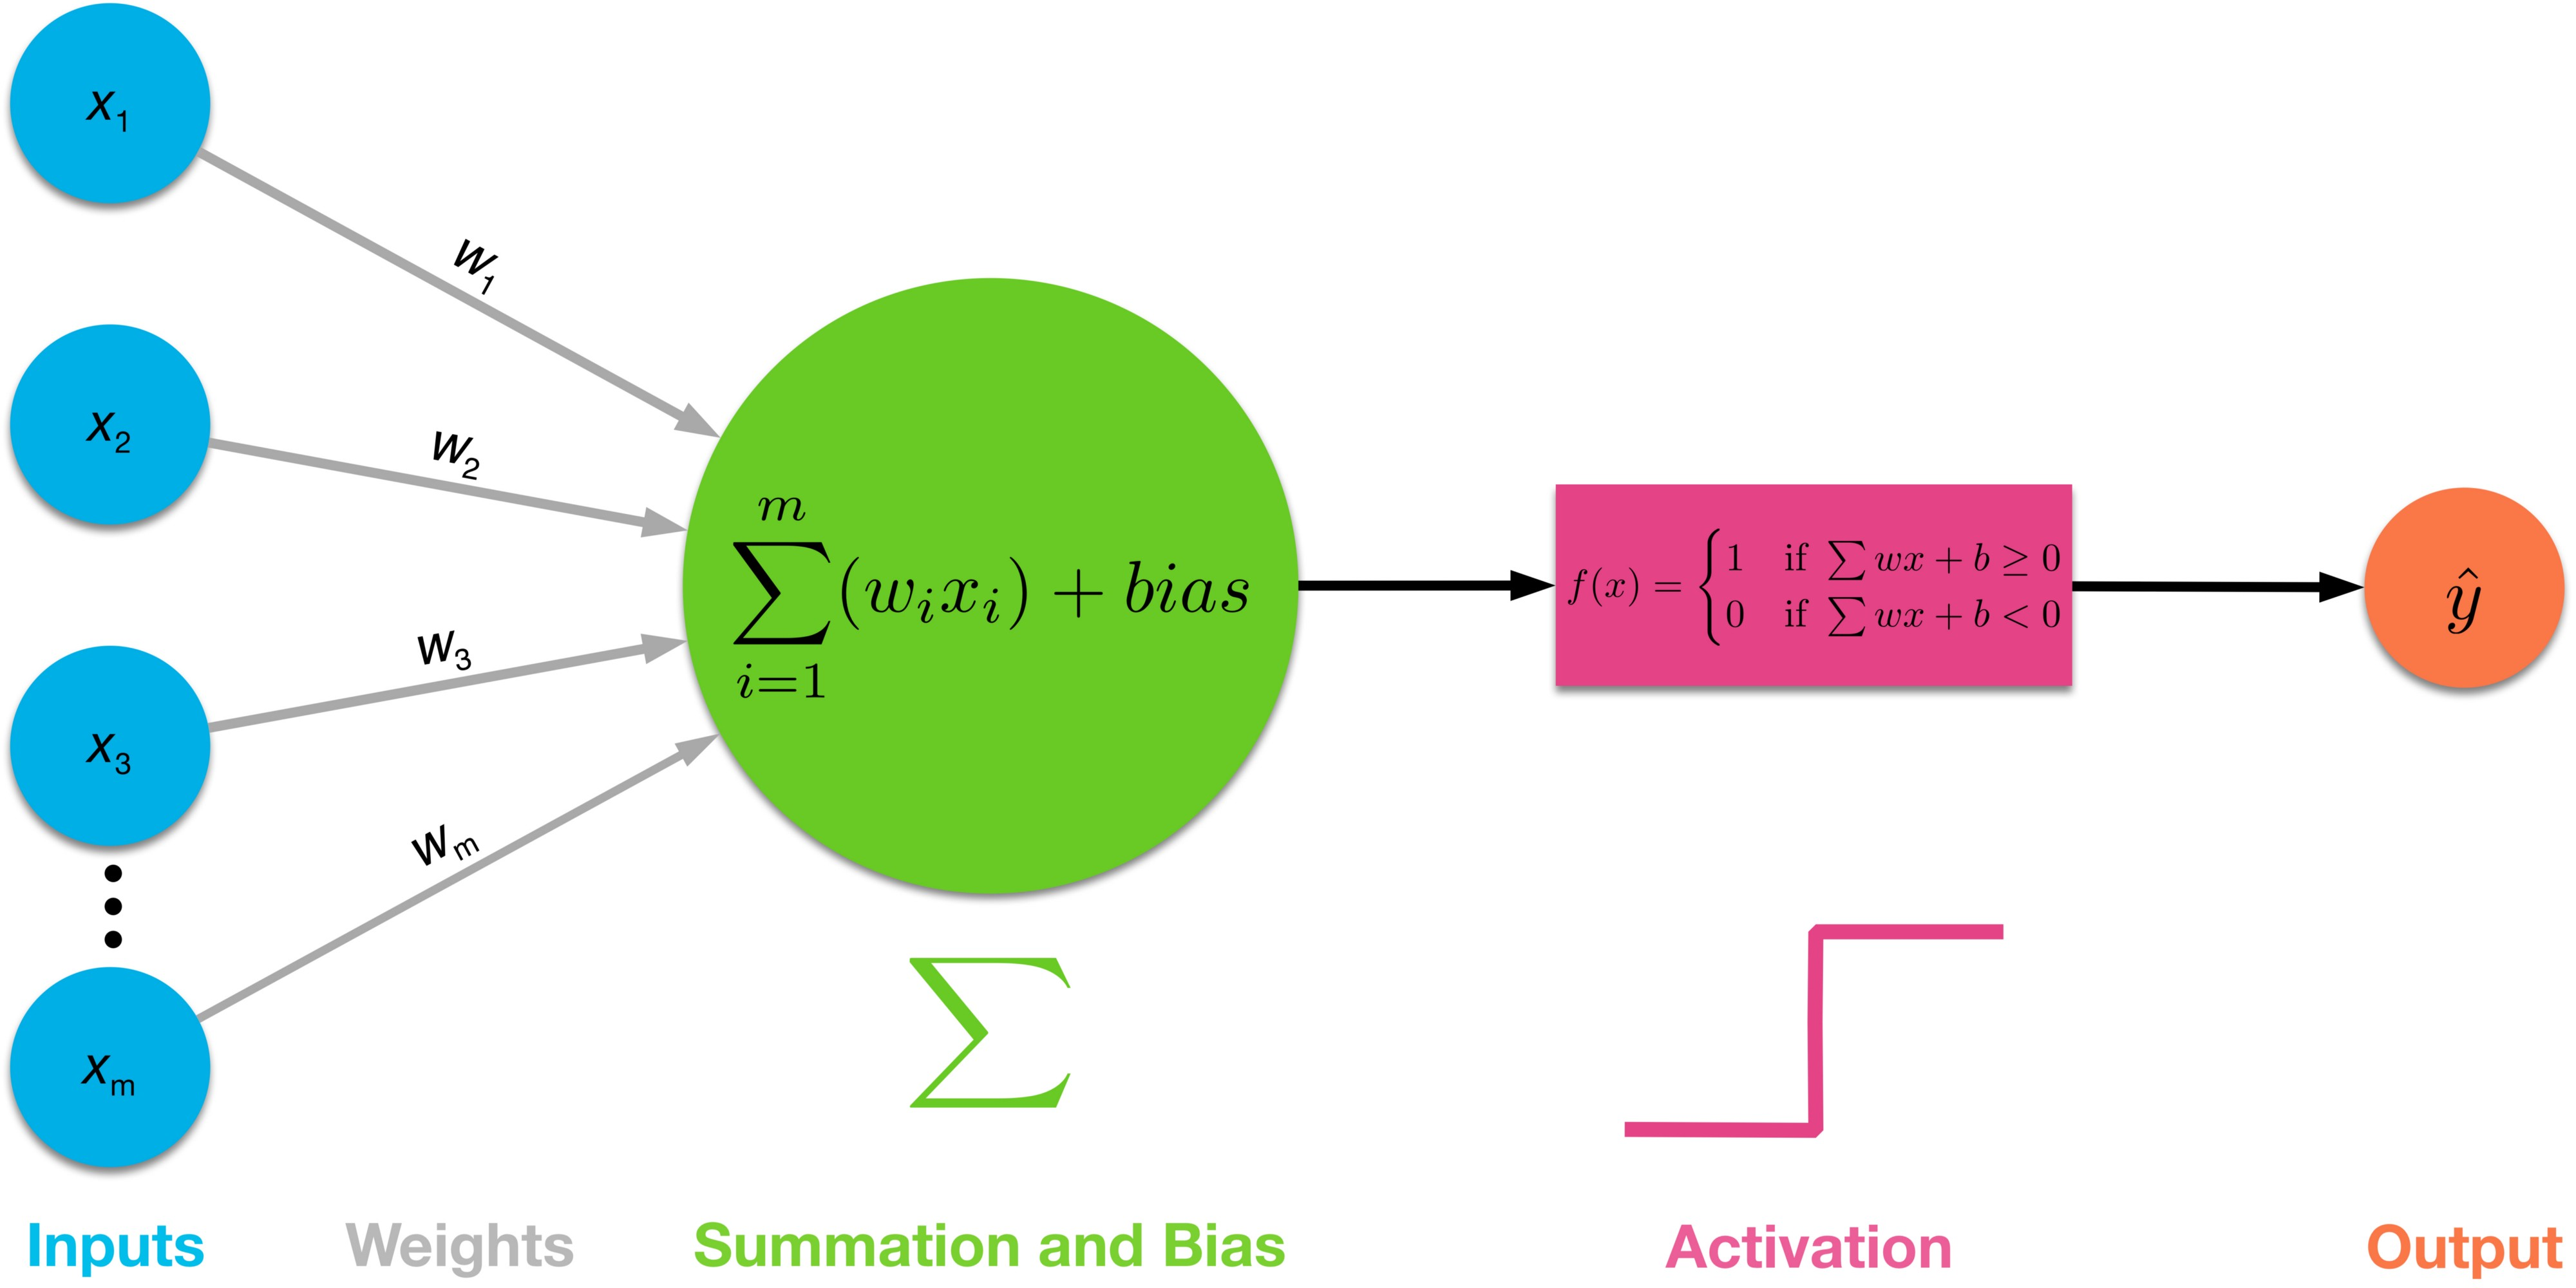
- Simplest Unit Perceptron
- Only one output layer
- No hidden Layer
- Input is not counted in layers

### Layer Network
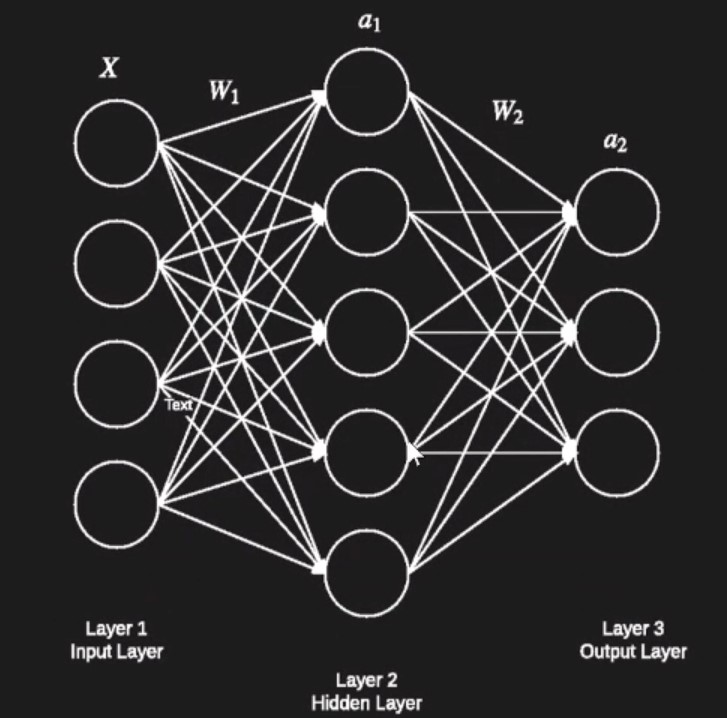
- Two layers 1 Hidden + 1 output
- Multi-layer perceptron or feed forward net or deep forward net

## 3 Layer Network
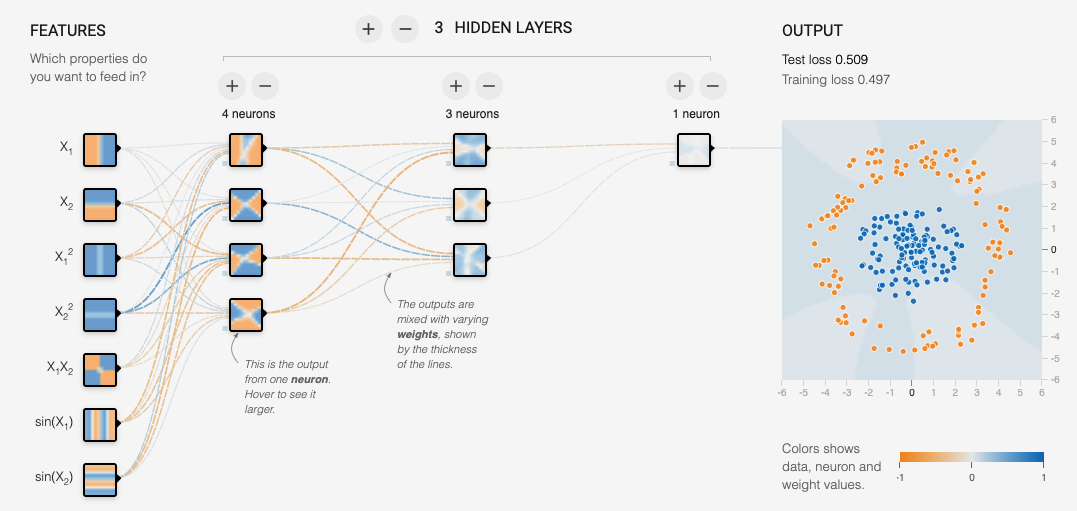
- Three layer 2 Hidden + 1 output
- Multi-layer perceptron/ feed forward net/deep forward net

# Part-1 Implementation

In [1]:
import numpy as np

In [2]:
# # Model parameters 
# input_size = 2 # no_of_features
# layers = [4,3] # no of neurons in 1st and 2nd hidden layer
# output_size = 2

In [3]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa, axis = 1, keepdims=True)
    
    return ans

In [4]:
# a = np.array([[10,20,30],
#               [40,50,60]]) # this is a 3x2 matrix

# eg_sum = np.sum(a)
# print("Simple Sum = ",eg_sum)

# # axis = 0 means add everything along row 
# # axis = 1 means add everything alongside column 
# eg_sum2 = np.sum(a,axis =0) 
# print("\n when axis =0 \n",eg_sum2)

# # if keepdims is set true then it take cares of the square brackets 
# # and doesn't let them get removed 
# eg_sum3 = np.sum(a,axis=1,keepdims=True)
# print("\n when keepdims=True \n",eg_sum3)

# softmax(a)

In [5]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        # Everytime we run this code the random values will stay same
        np.random.seed(0)
        
        model = {}
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        
        return y_
    
    def backward(self,x,y,learning_rate=0.001):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        # Output Layer
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        
        #Hidden Layers
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        #Update the model parameter using Gradient Descent
        self.model["W1"] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model["W2"] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model["W3"] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
    def predict(self,x):
        
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [6]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m= y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht
    
    

# Generating Data

In [7]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [8]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2,random_state=1,factor=0.2)

In [9]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


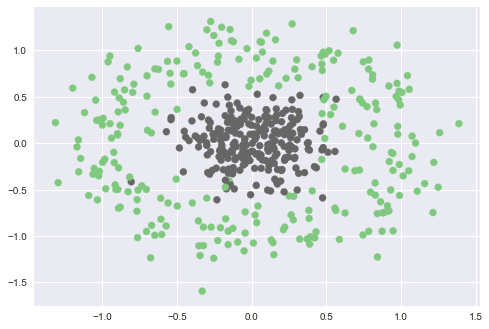

In [10]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [11]:
# y_oht = one_hot(Y,2)
 # print(y_oht)

In [12]:
# x = np.array([1,2])
# obj = NeuralNetwork(input_size,layers,output_size)
# y_ = obj.forward(x)
# print(y_)

# Training Our Model

In [13]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [14]:
# model.forward(X)
# model.backward(X,y_oht)

In [15]:
# model.summary()

In [16]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    traning_loss=[]
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        traning_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epochs %d Loss %.4f"%(ix,l))
            
    return traning_loss

In [31]:
losses = train(X,Y,model,500,0.001)

Epochs 0 Loss 0.0382
Epochs 1 Loss 0.0382
Epochs 2 Loss 0.0382
Epochs 3 Loss 0.0382
Epochs 4 Loss 0.0382
Epochs 5 Loss 0.0382
Epochs 6 Loss 0.0382
Epochs 7 Loss 0.0382
Epochs 8 Loss 0.0382
Epochs 9 Loss 0.0382
Epochs 10 Loss 0.0382
Epochs 11 Loss 0.0382
Epochs 12 Loss 0.0382
Epochs 13 Loss 0.0382
Epochs 14 Loss 0.0382
Epochs 15 Loss 0.0382
Epochs 16 Loss 0.0382
Epochs 17 Loss 0.0382
Epochs 18 Loss 0.0382
Epochs 19 Loss 0.0382
Epochs 20 Loss 0.0382
Epochs 21 Loss 0.0382
Epochs 22 Loss 0.0382
Epochs 23 Loss 0.0382
Epochs 24 Loss 0.0382
Epochs 25 Loss 0.0382
Epochs 26 Loss 0.0382
Epochs 27 Loss 0.0381
Epochs 28 Loss 0.0381
Epochs 29 Loss 0.0381
Epochs 30 Loss 0.0381
Epochs 31 Loss 0.0381
Epochs 32 Loss 0.0381
Epochs 33 Loss 0.0381
Epochs 34 Loss 0.0381
Epochs 35 Loss 0.0381
Epochs 36 Loss 0.0381
Epochs 37 Loss 0.0381
Epochs 38 Loss 0.0381
Epochs 39 Loss 0.0381
Epochs 40 Loss 0.0381
Epochs 41 Loss 0.0381
Epochs 42 Loss 0.0381
Epochs 43 Loss 0.0381
Epochs 44 Loss 0.0381
Epochs 45 Loss 0.038

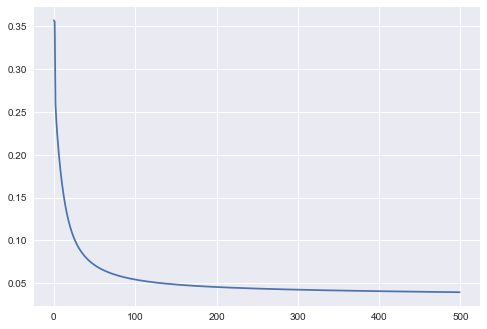

In [18]:
plt.plot(losses)

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Accuracy 



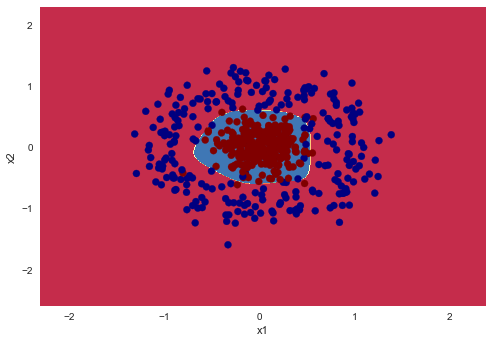

In [20]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [21]:
outputs = model.predict(X)

In [22]:
training_accuracy = np.sum(outputs == Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 97.0000


# Testing on other non-linear datasets

In [23]:
model_xor = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)



# XOR dataset

In [24]:
X_XOR = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]
             ])
Y_XOR = np.array([0,1,1,0])

In [25]:
losses_XOR = train(X=X_XOR,Y=Y_XOR,model=model_xor,epochs=200,learning_rate=0.1)

Epochs 0 Loss 0.3427
Epochs 1 Loss 0.2543
Epochs 2 Loss 0.2126
Epochs 3 Loss 0.1926
Epochs 4 Loss 0.1778
Epochs 5 Loss 0.1639
Epochs 6 Loss 0.1493
Epochs 7 Loss 0.1346
Epochs 8 Loss 0.1207
Epochs 9 Loss 0.1089
Epochs 10 Loss 0.1008
Epochs 11 Loss 0.1004
Epochs 12 Loss 0.1244
Epochs 13 Loss 0.1949
Epochs 14 Loss 0.3900
Epochs 15 Loss 0.1355
Epochs 16 Loss 0.0958
Epochs 17 Loss 0.0762
Epochs 18 Loss 0.0636
Epochs 19 Loss 0.0552
Epochs 20 Loss 0.0492
Epochs 21 Loss 0.0447
Epochs 22 Loss 0.0412
Epochs 23 Loss 0.0384
Epochs 24 Loss 0.0361
Epochs 25 Loss 0.0341
Epochs 26 Loss 0.0323
Epochs 27 Loss 0.0307
Epochs 28 Loss 0.0293
Epochs 29 Loss 0.0281
Epochs 30 Loss 0.0269
Epochs 31 Loss 0.0258
Epochs 32 Loss 0.0248
Epochs 33 Loss 0.0239
Epochs 34 Loss 0.0231
Epochs 35 Loss 0.0223
Epochs 36 Loss 0.0215
Epochs 37 Loss 0.0208
Epochs 38 Loss 0.0202
Epochs 39 Loss 0.0196
Epochs 40 Loss 0.0190
Epochs 41 Loss 0.0184
Epochs 42 Loss 0.0179
Epochs 43 Loss 0.0174
Epochs 44 Loss 0.0170
Epochs 45 Loss 0.016

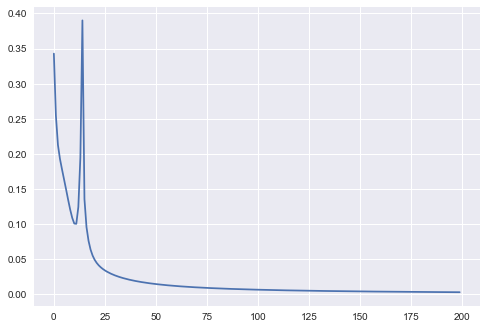

In [26]:
plt.plot(losses_XOR)

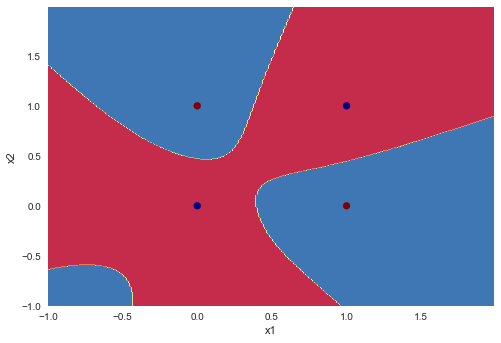

In [27]:
plot_decision_boundary(lambda x:model_xor.predict(x),X_XOR,Y_XOR)

# Other datasets

In [28]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [29]:
def load_dataset(dataset):
    if dataset == 'moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) #Perceptron
    elif dataset == 'circles':
        X,Y = make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)
    elif dataset == 'classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]
             ])
        Y = np.array([0,1,1,0])
        
    return X,Y
        

Training Accuracy 1.0000


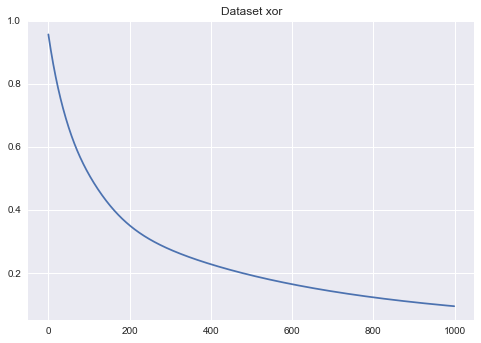

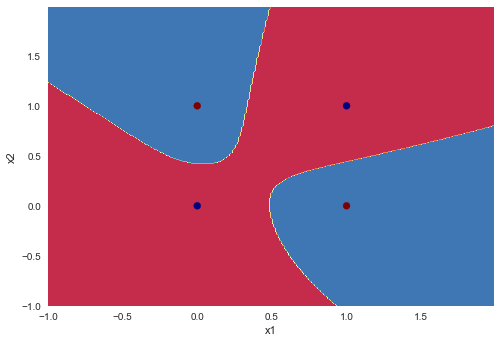

Training Accuracy 0.9600


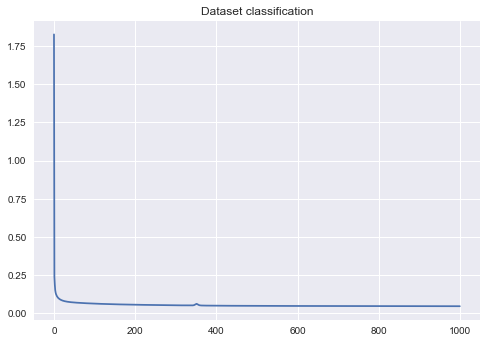

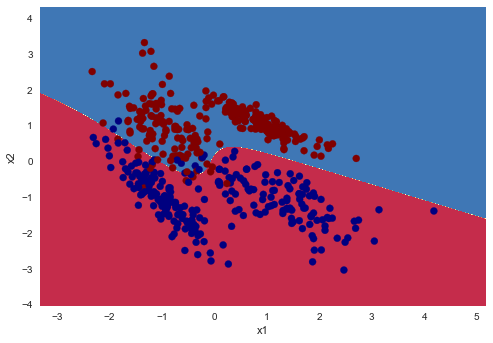

Training Accuracy 0.9740


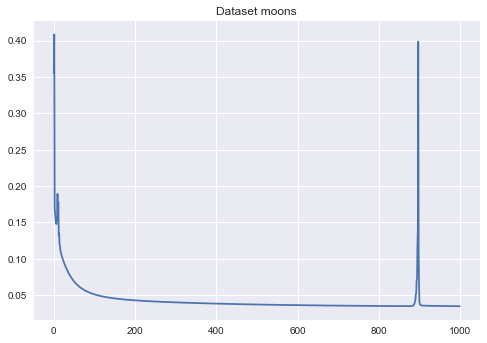

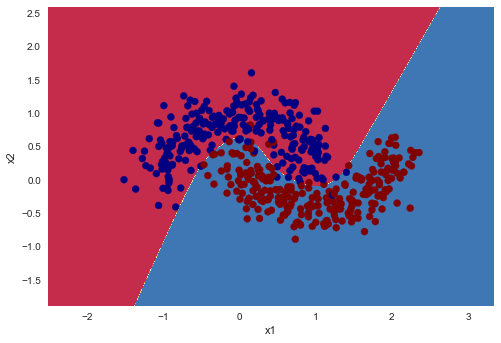

Training Accuracy 0.9640


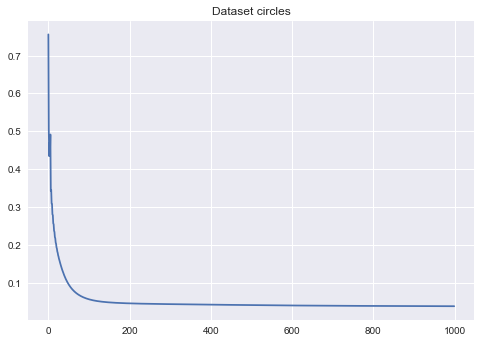

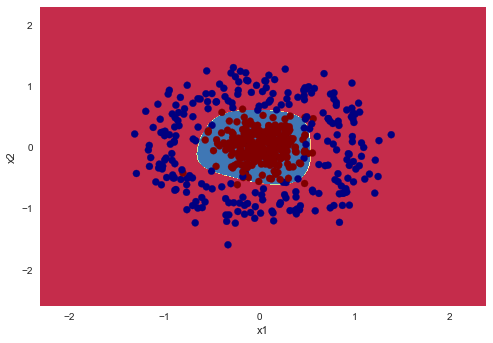

In [30]:
datasets = ["xor","classification","moons","circles"]

for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y = load_dataset(d)
    losses = train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Accuracy %.4f"%training_accuracy)
    
    plt.title("Dataset "+d)
    plt.plot(losses)
    plt.show()
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()